In [1]:
import  numpy                   as      np
import  matplotlib.pyplot       as      plt

from    custom_kinetic.utils    import  *

In [2]:
from    scipy.interpolate       import  RegularGridInterpolator

In [3]:
def f_init(x: np.ndarray, v: np.ndarray) -> np.ndarray:
    x = x[:, None]
    v = v[None, :]
    return np.sin(np.pi*x - v*0) + 2.5


def f_init(xv: np.ndarray) -> np.ndarray:
    dim = xv.shape[-1] // 2
    x = xv[..., :dim]
    v = xv[..., dim:]
    return np.sin(np.sum(np.pi*x-v*0, axis=-1)) + 2.5

(51, 101)


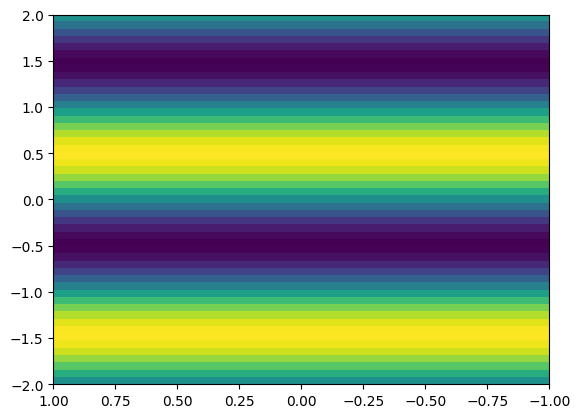

In [4]:
dim = 1

max_x, max_v = 2.0, 1.0
num_x, num_v = 51, 101
arr_x = np.linspace(-max_x, max_x, num_x)
arr_v = np.linspace(-max_v, max_v, num_v)
delta_x = float(arr_x[1] - arr_x[0])
delta_v = float(arr_v[1] - arr_v[0])

grid_xv = np.stack(np.meshgrid(arr_x, arr_v, indexing='ij'), axis=-1)
arr_f = f_init(grid_xv)
print(arr_f.shape)

_extent = [max(arr_v), min(arr_v), min(arr_x), max(arr_x), ]
plt.imshow(arr_f, origin='lower', aspect='auto', extent=_extent)
plt.show()

In [5]:
delta_t = 0.01
query = grid_xv.copy()
query[..., :dim] -= delta_t * query[..., dim:]
query[..., :dim] = (query[..., :dim] + max_x) % (2*max_x) - max_x

In [6]:
arr_distribution = [arr_f]
t_curr = 0.0
while t_curr < 1.0:
    interp = RegularGridInterpolator((arr_x, arr_v), arr_distribution[-1], bounds_error=False, fill_value=None)
    arr_distribution.append( interp(query) )
    t_curr += delta_t
arr_distribution = np.array(arr_distribution)

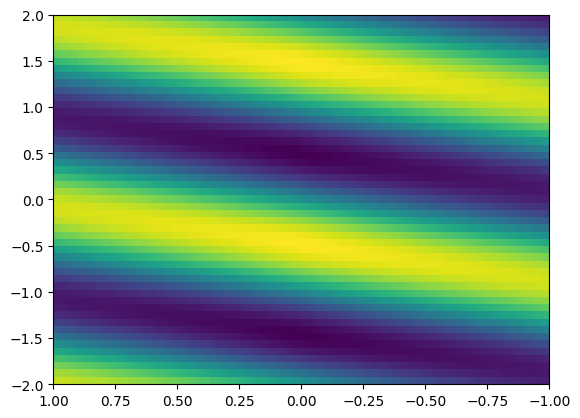

In [7]:
plt.imshow(arr_distribution[40], aspect='auto', extent=_extent)
plt.show()

In [16]:
_arr_v_reshaped = arr_v.reshape(*ones(2*dim), num_v, dim)
mass        = np.sum(arr_distribution, axis=(-2, -1)) * (delta_x * delta_v)
momentum    = np.sum(arr_distribution[..., None] * _arr_v_reshaped, axis=(-3, -2)) * (delta_x * delta_v)
energy      = np.sum(arr_distribution * np.sum(_arr_v_reshaped**2, axis=-1), axis=(-2, -1)) * (delta_x * delta_v)

print(arr_distribution.shape)

(101, 51, 101)


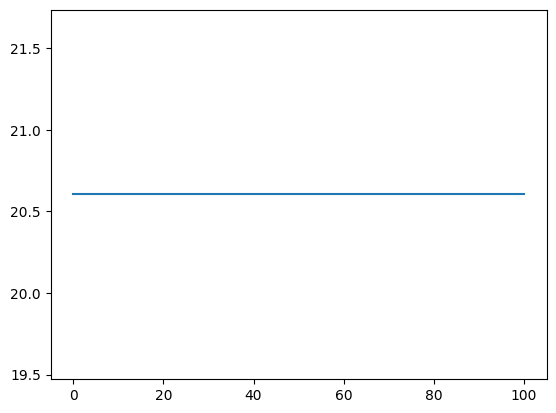

In [17]:
plt.plot(mass)

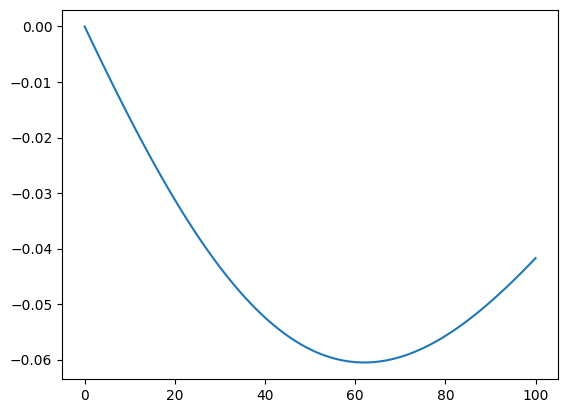

In [18]:
plt.plot(momentum)

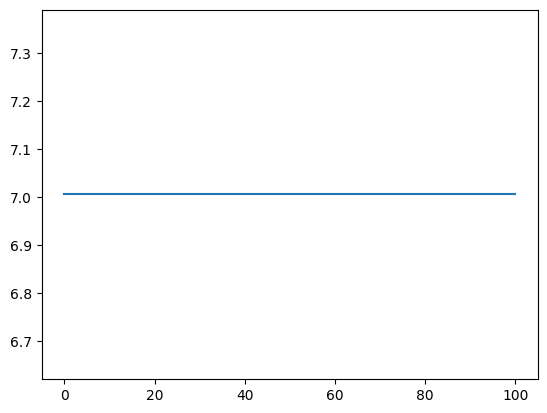

In [19]:
plt.plot(energy)